In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/processed/all_polar_embeddings_bias_analysis.csv" )

In [3]:
df = df.drop(columns = "Unnamed: 0").drop_duplicates()

In [4]:
def print_p(a,b, c = 0.01,): # return a dict of antonym pairs and its p-value
    temp = dict()
    for each_pair in antonym_pair:
        s,p = ttest_ind(a[each_pair], b[each_pair]) # t-test
        if p <= c: 
            temp[each_pair] = p
    return temp

In [5]:
def print_s(a,b, c = 0.01): # return a dict of antonym pairs and its t-statistics 
    temp = dict()
    for each_pair in antonym_pair:
        s,p = ttest_ind(a[each_pair], b[each_pair])
        if p <= c:
            temp[each_pair] = s
    return temp

In [6]:
def add_direction(df, name=''):
    for index, row in df.iterrows():
        if row[1] > 0:
            temp = index.split(' ')[1]
        else:
            temp = index.split(' ')[0]
        df.loc[index, name+'_direction'] = temp
    return df.rename(columns={0: 'p_values'}).drop(columns = 1)

def make_df(x1,x2, name = '', c=0.01): # helper function
    return add_direction(pd.DataFrame([print_p(x1, x2), print_s(x1, x2)]).transpose(), name)

In [7]:
antonym_pair = df.groupby("Country").mean().columns  # all the business antonym pairs

## T-test for each pair of sources

In [8]:
reddit = df[df["Source"] == "reddit"]
wiki = df[df["Source"] == "wiki"]
gnews = df[df["Source"] == "gnews"]
twitter = df[df["Source"] == "twitter"]

In [9]:
gnews.head()

,Company Name,environment pollution,corruption integrity,loss profit,foreigners natives,credible deceptive,spectators stakeholders,sustainable unsustainable,demand supply,feminine masculine,...,alliance proprietorship,details outlines,dependent independent,goodies salary,risky secure,essential luxury,purchaser supplier,neglect responsible,Country,Source
2,abbott,-0.074959,-0.006839,-0.189134,-0.104886,0.039043,-0.160424,0.174593,0.022168,0.028409,...,-0.065060,0.107621,-0.140134,0.047994,-0.063743,0.034680,0.015905,-0.096182,USA,gnews
5,acs,-0.044885,-0.143394,0.012820,0.005434,-0.028565,0.049384,0.082006,-0.037802,0.011810,...,-0.171714,-0.024552,-0.011358,0.092117,-0.054703,0.090768,-0.218966,-0.038562,Spain,gnews
8,aeon,0.204704,0.053274,-0.084227,-0.165779,0.029282,-0.034261,-0.212772,-0.103084,0.040999,...,-0.162635,0.146812,0.099542,0.015580,0.126087,0.050918,0.097332,0.098509,Japan,gnews
14,aia,0.034212,0.035628,-0.116661,0.139427,-0.139058,-0.041280,0.208403,0.034534,-0.038012,...,-0.084580,0.013530,0.159177,0.040608,-0.161203,0.076451,0.052027,-0.021225,China,gnews
16,airbus,-0.008080,0.120510,0.093539,0.090095,0.095443,0.165503,-0.101506,-0.034198,0.108048,...,0.094064,0.005881,0.094122,-0.026366,0.107847,-0.079531,0.030842,-0.091881,Netherlands,gnews


In [10]:
reddit_gnews = make_df(reddit, gnews, 'reddit_gnews')
reddit_gnews

,p_values,reddit_gnews_direction
corruption integrity,5.506968e-06,integrity
loss profit,5.145660e-10,profit
credible deceptive,2.695213e-04,credible
sustainable unsustainable,3.530805e-06,unsustainable
feminine masculine,1.780746e-15,feminine
satisfied unsatisfied,4.783414e-04,unsatisfied
isolating social,1.795408e-03,social
artisanal financial,3.820694e-25,artisanal
insiders outsiders,9.256506e-08,outsiders
flexible rigid,3.599167e-12,flexible


In [11]:
reddit_twitter = make_df(reddit, twitter, 'reddit_twitter')
reddit_twitter

,p_values,reddit_twitter_direction
environment pollution,5.876037e-06,environment
corruption integrity,3.255172e-03,integrity
credible deceptive,9.520346e-10,deceptive
spectators stakeholders,1.578252e-11,spectators
sustainable unsustainable,1.974495e-12,unsustainable
feminine masculine,1.304103e-18,feminine
satisfied unsatisfied,4.911960e-25,unsatisfied
isolating social,7.924456e-07,isolating
marketing secret,4.792375e-05,marketing
insiders outsiders,3.552916e-03,outsiders


In [12]:
reddit_wiki = make_df(reddit, wiki, 'reddit_wiki')
reddit_wiki

,p_values,reddit_wiki_direction
environment pollution,1.080830e-04,environment
corruption integrity,4.942768e-09,integrity
loss profit,9.451965e-08,profit
credible deceptive,2.995673e-04,credible
sustainable unsustainable,8.362266e-10,unsustainable
feminine masculine,5.819962e-11,feminine
satisfied unsatisfied,5.719255e-05,unsatisfied
marketing secret,8.239309e-19,marketing
mistrust trust,6.532666e-13,trust
analogue digital,1.875266e-09,analogue


In [13]:
gnews_twitter = make_df(gnews, twitter, 'gnews_twitter')
gnews_twitter

,p_values,gnews_twitter_direction
environment pollution,2.347755e-05,environment
loss profit,8.075896e-13,loss
foreigners natives,8.202885e-06,natives
credible deceptive,2.652510e-23,deceptive
spectators stakeholders,1.385442e-08,spectators
satisfied unsatisfied,7.808002e-11,unsatisfied
isolating social,2.619311e-14,isolating
artisanal financial,4.309197e-15,financial
marketing secret,1.985989e-04,marketing
insiders outsiders,3.310172e-03,insiders


In [14]:
gnews_wiki = make_df(gnews, wiki, 'gnews_wiki')
gnews_wiki

,p_values,gnews_wiki_direction
environment pollution,3.755325e-04,environment
artisanal financial,1.309232e-21,financial
marketing secret,7.402335e-16,marketing
insiders outsiders,1.008588e-06,insiders
mistrust trust,1.266426e-08,trust
flexible rigid,7.145655e-08,rigid
analogue digital,7.311583e-04,digital
obscurity transparency,7.461812e-08,obscurity
innovative traditional,7.644728e-04,traditional
disorder order,1.099533e-03,order


In [15]:
twitter_wiki = make_df(twitter, wiki,'twitter_wiki')
twitter_wiki

,p_values,twitter_wiki_direction
corruption integrity,6.725373e-03,integrity
loss profit,1.718271e-10,profit
foreigners natives,2.537383e-06,foreigners
credible deceptive,2.080411e-20,credible
spectators stakeholders,1.863544e-11,stakeholders
feminine masculine,4.086033e-03,masculine
satisfied unsatisfied,1.786520e-09,satisfied
isolating social,1.411452e-09,social
marketing secret,1.216016e-04,marketing
analogue digital,7.521306e-03,analogue


In [16]:
# record the correlation for visualization

dict_num_corr = dict()
dict_num_corr['reddit'] = dict()
dict_num_corr['gnews'] = dict()
dict_num_corr['twitter'] = dict()

In [17]:
dict_num_corr['reddit']['wiki'] = len(reddit_wiki)

In [18]:
dict_num_corr['reddit']['twitter'] = len(reddit_twitter)

In [19]:
dict_num_corr['reddit']['gnews'] = len(reddit_gnews)

In [20]:
dict_num_corr['gnews']['twitter'] = len(gnews_twitter)

In [21]:
dict_num_corr['gnews']['wiki'] = len(gnews_wiki)

In [22]:
dict_num_corr['twitter']['wiki'] = len(twitter_wiki)

In [23]:
dict_num_corr['reddit']['reddit'] = 0
num_df = pd.DataFrame(dict_num_corr)

In [24]:
num_df = num_df.reindex(columns = num_df.index)

In [25]:
source = ['reddit', 'twitter', 'gnews', 'wiki'] 
for i in source:  # create a correlation df
    for j in source:
        if i == j:
            num_df.loc[i,j] = 0
        elif num_df.loc[i][j] > 0:
            pass
        else:
            num_df.loc[i,j] = num_df.loc[j,i]

In [26]:
num_df

,wiki,twitter,gnews,reddit
wiki,0.0,46.0,36.0,41
twitter,46.0,0.0,46.0,50
gnews,36.0,46.0,0.0,44
reddit,41.0,50.0,44.0,0


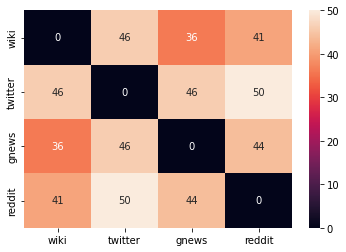

In [27]:
sn.heatmap(num_df, annot=True)
plt.show()

In [28]:
pair_df = pd.DataFrame([reddit_wiki,reddit_twitter,reddit_gnews,gnews_twitter,gnews_wiki,twitter_wiki]).transpose()


/Users/stjepankusenic/POLAR_WEBE/venv/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [29]:
pd.concat([reddit_wiki,reddit_twitter,reddit_gnews,gnews_twitter,gnews_wiki,twitter_wiki], axis = 1).to_csv("pairs_pvalue1.csv")

In [30]:
correlation_matrix = dict()
correlation_matrix['reddit'] = dict()
correlation_matrix['gnews'] = dict()
correlation_matrix['twitter'] = dict()
correlation_matrix['wiki'] = dict()


In [31]:
reddit_twitter

,p_values,reddit_twitter_direction
environment pollution,5.876037e-06,environment
corruption integrity,3.255172e-03,integrity
credible deceptive,9.520346e-10,deceptive
spectators stakeholders,1.578252e-11,spectators
sustainable unsustainable,1.974495e-12,unsustainable
feminine masculine,1.304103e-18,feminine
satisfied unsatisfied,4.911960e-25,unsatisfied
isolating social,7.924456e-07,isolating
marketing secret,4.792375e-05,marketing
insiders outsiders,3.552916e-03,outsiders


In [32]:
correlation_matrix['reddit']['twitter'] = sum(np.log(reddit_twitter['p_values']))/52

In [33]:
correlation_matrix['reddit']['gnews'] = sum(np.log(list(reddit_gnews['p_values'])))/45

In [34]:
correlation_matrix['reddit']['wiki'] = sum(np.log(list(reddit_wiki['p_values'])))/42

In [35]:
correlation_matrix['gnews']['twitter'] = sum(np.log(list(gnews_twitter['p_values'])))/49

In [36]:
correlation_matrix['gnews']['wiki'] = sum(np.log(list(gnews_wiki['p_values'])))/39

In [37]:
correlation_matrix['twitter']['wiki'] = sum(np.log(list(twitter_wiki['p_values'])))/45

In [38]:
correlation_matrix['reddit']['reddit'] = 0
corr_df = pd.DataFrame(correlation_matrix)


In [39]:
source = ['reddit', 'twitter', 'gnews', 'wiki']
for i in source:
    for j in source:
        if i == j:
            corr_df.loc[i][j] = 0
        elif corr_df.loc[i][j] < 0:
            pass
        else:
            corr_df.loc[i][j] = corr_df.loc[j][i]

In [40]:
corr_df = corr_df.reindex(index = corr_df.columns)

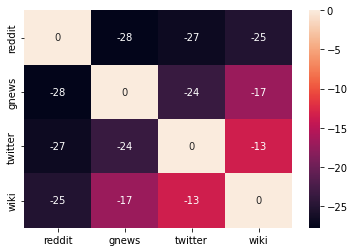

In [41]:
sn.heatmap(corr_df, annot=True)
plt.show()

## USA vs non-USA bias

In [42]:
us = df[df["Country"] == "USA"]
other = df[df["Country"] != "USA"]

In [43]:
other

,Company Name,environment pollution,corruption integrity,loss profit,foreigners natives,credible deceptive,spectators stakeholders,sustainable unsustainable,demand supply,feminine masculine,...,alliance proprietorship,details outlines,dependent independent,goodies salary,risky secure,essential luxury,purchaser supplier,neglect responsible,Country,Source
4,acs,-0.052827,-0.005069,-0.310502,-0.078616,0.066206,-0.122106,-0.110932,-0.100536,-0.077579,...,0.023306,-0.096557,-0.130887,0.011273,-0.121748,0.049629,-0.039535,-0.057846,Spain,wiki
5,acs,-0.044885,-0.143394,0.012820,0.005434,-0.028565,0.049384,0.082006,-0.037802,0.011810,...,-0.171714,-0.024552,-0.011358,0.092117,-0.054703,0.090768,-0.218966,-0.038562,Spain,gnews
6,acs,-0.037458,0.108747,-0.019897,-0.031330,-0.049514,-0.108895,0.121798,-0.020865,-0.222429,...,-0.100603,-0.011069,-0.217284,0.124258,-0.127902,0.056388,-0.053718,0.015282,Spain,reddit
7,acs,0.133616,0.193238,-0.011075,-0.174608,-0.035155,-0.011787,-0.083801,-0.080335,-0.242340,...,0.088426,-0.073699,-0.097051,0.088030,-0.157922,-0.046752,0.011622,-0.143740,Spain,twitter
8,aeon,0.204704,0.053274,-0.084227,-0.165779,0.029282,-0.034261,-0.212772,-0.103084,0.040999,...,-0.162635,0.146812,0.099542,0.015580,0.126087,0.050918,0.097332,0.098509,Japan,gnews
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,volvo,0.081827,0.001636,-0.070746,0.075350,-0.181372,-0.071981,0.002580,-0.168466,-0.274105,...,0.085855,-0.066444,-0.074453,0.005390,-0.020603,-0.212256,0.062747,-0.068221,Sweden,twitter
792,wh,0.097603,0.009588,-0.106316,0.043148,0.007853,-0.096261,0.079689,0.099610,-0.022370,...,-0.002685,-0.022495,-0.041670,0.156728,-0.050969,0.025500,0.016464,0.053207,China,gnews
793,wh,0.381410,0.005098,0.105669,-0.085212,-0.041336,0.143743,-0.077484,-0.093640,0.001208,...,0.127046,0.095518,0.062038,-0.005291,0.006602,0.073032,0.184474,-0.210904,China,twitter
794,wh,0.066825,0.028561,-0.208384,0.024652,-0.086334,-0.008968,-0.162499,-0.357131,-0.031391,...,-0.080775,0.146789,-0.094195,0.075561,-0.093419,0.128465,-0.022465,-0.070029,China,wiki


In [44]:
us_mean = us.groupby("Company Name").mean()
other_mean = other.groupby("Company Name").mean()

In [45]:
us_reddit = us[us["Source"] == 'reddit']
other_reddit = other[other["Source"] == 'reddit']

us_wiki = us[us["Source"] == 'wiki']
other_wiki = other[other["Source"] == 'wiki']

us_gnews = us[us["Source"] == 'gnews']
other_gnews = other[other["Source"] == 'gnews']

us_twitter = us[us["Source"] == 'twitter']
other_twitter = other[other["Source"] == 'twitter']

In [46]:
bias_reddit = make_df(us_reddit, other_reddit)
bias_reddit

,p_values,_direction
spectators stakeholders,0.000422,spectators
criminal rightful,0.001152,rightful
bankruptcy prosperity,0.000060,bankruptcy
online store,0.003500,online
intangible tangible,0.001691,tangible
goal task,0.000016,goal
globally locally,0.007929,globally
manager worker,0.000318,worker


In [47]:
bias_twitter = make_df(us_twitter, other_twitter)
bias_twitter

,p_values,_direction
criminal rightful,0.003312,rightful
discrimination impartial,0.008489,impartial
follower innovator,0.001381,follower
consultant employees,0.000002,consultant
child childless,0.000033,childless


In [48]:
bias_gnews = make_df(us_gnews, other_gnews)
bias_gnews

,p_values,_direction
ambiguity clarity,0.003941,ambiguity
modern outdated,0.003495,modern
goodies salary,0.007491,goodies


In [49]:
bias_wiki = make_df(us_wiki, other_wiki)
bias_wiki

,p_values,_direction
foreigners natives,3.216649e-03,foreigners
sustainable unsustainable,4.672976e-03,sustainable
satisfied unsatisfied,7.647982e-04,unsatisfied
insiders outsiders,1.258298e-03,outsiders
opportunity threat,3.677289e-06,threat
obscurity transparency,5.633057e-04,transparency
criminal rightful,2.270933e-03,rightful
bankruptcy prosperity,1.012205e-03,prosperity
economic overpriced,4.611480e-03,economic
challenge obscurity,9.482957e-03,obscurity


In [50]:
d = {}
d["reddit"] = bias_reddit
d["twitter"] = bias_twitter
d["wiki"] = bias_wiki
d["gnews"] = bias_gnews


In [51]:
us_bias_df = pd.DataFrame([bias_reddit, bias_twitter, bias_gnews, bias_wiki]).transpose()

/Users/stjepankusenic/POLAR_WEBE/venv/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [52]:
us_bias_df.columns = ['reddit', 'twitter', 'gnews', 'wiki']

In [53]:
def sumlog(x):
    return sum(np.log(x))

In [54]:
sumlog(bias_reddit['p_values'])/8

-7.5272771171013915

In [55]:
sumlog(bias_wiki['p_values'])/13

-7.518604718683065

In [56]:
sumlog(bias_twitter['p_values'])/5

-8.077829734874069

In [57]:
sumlog(bias_gnews['p_values'])/3

-5.362355980033498

In [58]:
print_s(us_twitter, other_twitter, 0.01)

{'criminal rightful': 2.9790608304766644,
 'discrimination impartial': 2.6628337254894627,
 'follower innovator': -3.252016619973896,
 'consultant employees': -4.893895612597726,
 'child childless': 4.267728389768247}

In [59]:
print_s(us_reddit, other_reddit, 0.01)

{'spectators stakeholders': -3.5964225145973834,
 'criminal rightful': 3.3062265332999754,
 'bankruptcy prosperity': -4.115995782859494,
 'online store': -2.961268031342959,
 'intangible tangible': 3.190396180025157,
 'goal task': -4.43840620074544,
 'globally locally': -2.6866639002559776,
 'manager worker': 3.674785968708459}

In [60]:
print_s(us_wiki, other_wiki, 0.01)

{'foreigners natives': -2.9884843809920527,
 'sustainable unsustainable': -2.8664399136501313,
 'satisfied unsatisfied': 3.4268690868083063,
 'insiders outsiders': 3.279918892470648,
 'opportunity threat': 4.785048862370253,
 'obscurity transparency': 3.5148225674673226,
 'criminal rightful': 3.09898310622445,
 'bankruptcy prosperity': 3.344744485909144,
 'economic overpriced': -2.8708353722028646,
 'challenge obscurity': 2.6237628467984866,
 'majority minorities': -2.900322002930457,
 'natural technical': 2.98981984808994,
 'essential luxury': 6.053017490074762}

In [61]:
print_s(us_gnews, other_gnews, 0.01)

{'ambiguity clarity': -2.922621764401764,
 'modern outdated': -2.9617335445228608,
 'goodies salary': -2.706426960297071}

In [62]:
print_s(us_mean, other_mean, 0.01)

{'insiders outsiders': 2.750337787580067,
 'criminal rightful': 4.137270179876413,
 'consultant employees': -3.2698171486545755,
 'conservative progressive': 2.621186701203238,
 'goodies salary': -2.8382690945566384,
 'essential luxury': 3.9313955363450495}

In [63]:
us_df = pd.DataFrame([print_p(us_mean, other_mean), print_s(us_mean, other_mean, 0.01)]).transpose()

In [64]:
print_p(us_mean, other_mean, 0.05)

{'loss profit': 0.047100542768793496,
 'sustainable unsustainable': 0.01235205343784059,
 'feminine masculine': 0.011592504136470677,
 'satisfied unsatisfied': 0.015794755999276676,
 'insiders outsiders': 0.006614013177540813,
 'analogue digital': 0.03694898698058731,
 'opportunity threat': 0.010496616309718104,
 'obscurity transparency': 0.02628367066129509,
 'criminal rightful': 5.573752168909156e-05,
 'majority minorities': 0.022027527373284683,
 'consultant employees': 0.0013085013698509453,
 'cost revenue': 0.01255388076725932,
 'child childless': 0.01119528667178471,
 'globally locally': 0.015363399499038206,
 'conservative progressive': 0.00957629579547272,
 'goodies salary': 0.005102236053221453,
 'essential luxury': 0.0001237945813446426,
 'purchaser supplier': 0.011219703586472068}